In [1]:
!pip install -q kaggle


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aplagroup","key":"3db647cdc76d7e5366cbea3d74a68cd6"}'}

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets list

ref                                                              title                                                size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  ---------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
neurocipher/heartdisease                                         Heart Disease                                        3491  2025-12-11 15:29:14.327000           2114         74  1.0              
wardabilal/spotify-global-music-dataset-20092025                 Spotify Global Music Dataset (2009–2025)          1289021  2025-11-11 09:43:05.933000          16387        418  1.0              
prince7489/gaming-hours-vs-academic-and-work-performance         Gaming Hours vs Academic & Work Performance         15335  2025-12-16 15:27:08.140000             40         24  0.9411765        
kundanbedmutha/exam-

In [7]:
!kaggle competitions download -c dogs-vs-cats

 97% 789M/812M [00:05<00:00, 117MB/s]
100% 812M/812M [00:05<00:00, 166MB/s]


In [8]:
!unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [9]:
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [10]:
!unzip test1.zip

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

In [11]:
!ls


dogs-vs-cats.zip  sample_data		test1	   train
kaggle.json	  sampleSubmission.csv	test1.zip  train.zip


In [13]:
!pip install opencv-python scikit-image tqdm

In [14]:
import os
import cv2
import numpy as np

from tqdm import tqdm
from skimage.feature import hog

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [15]:
imgsize = 128
X = []
y = []

In [16]:
for file in tqdm(os.listdir("train")):
    if file.startswith("cat"):
        label = 0
    else:
        label = 1

    path = os.path.join("train", file)

    img = cv2.imread(path)
    img = cv2.resize(img, (imgsize, imgsize))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    features = hog(
        img,
        orientations=9,
        pixels_per_cell=(8,8),
        cells_per_block=(2,2),
        block_norm="L2-Hys"
    )

    X.append(features)
    y.append(label)

100%|██████████| 25000/25000 [04:19<00:00, 96.25it/s] 


In [17]:
X = np.array(X)
y = np.array(y)

print(X.shape)
print(y.shape)

(25000, 8100)
(25000,)


In [18]:
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [19]:
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [20]:
svm = SVC(
    kernel="rbf",
    C=10,
    gamma="scale"
)
svm.fit(Xtrain, ytrain)
# from sklearn.svm import LinearSVC

# svm = LinearSVC(C=1.0, max_iter=10000)
# svm.fit(Xtrain, ytrain)


SVC(C=10)

In [21]:
ypred = svm.predict(Xtest)

print("Accuracy:", accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))

Accuracy: 0.7784
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      2500
           1       0.78      0.77      0.78      2500

    accuracy                           0.78      5000
   macro avg       0.78      0.78      0.78      5000
weighted avg       0.78      0.78      0.78      5000



#**Improvement using PCA + GridSearchCV (SVM)**


*   Reduce feature dimensionality
*   Remove noise & redundancy


*   Improve generalization (not overfitting)





In [22]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [23]:
pca = PCA(n_components=0.95, random_state=42)

Xtrain_pca = pca.fit_transform(Xtrain)
Xtest_pca = pca.transform(Xtest)

print(Xtrain.shape)
print(Xtrain_pca.shape)

(20000, 8100)
(20000, 2015)


In [24]:
# from sklearn.svm import LinearSVC

# paramgrid = {"C": [0.01, 0.1, 1, 10]}

# grid = GridSearchCV(
#     LinearSVC(max_iter=10000),
#     paramgrid,
#     cv=3,
#     n_jobs=-1
# )

# grid.fit(Xtrain_pca, ytrain)

In [25]:
paramgrid = {
    "C": [0.1, 1, 10, 50],
    "gamma": ["scale", 0.01, 0.001],
    "kernel": ["rbf"]
}

In [26]:
grid = GridSearchCV(
    SVC(),
    paramgrid,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2
)
Xsub = Xtrain_pca[:5000]
ysub = ytrain[:5000]
grid.fit(Xsub, ysub)
# grid.fit(Xtrain_pca, ytrain)
# grid.fit(Xtrain_pca, ytrain)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 50], 'gamma': ['scale', 0.01, 0.001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=2)

In [27]:
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Accuracy: 0.7277995781395942


In [28]:
bestsvm = grid.best_estimator_

ypred_pca = bestsvm.predict(Xtest_pca)

print("Test Accuracy:", accuracy_score(ytest, ypred_pca))
print(classification_report(ytest, ypred_pca))

Test Accuracy: 0.7304
              precision    recall  f1-score   support

           0       0.73      0.72      0.73      2500
           1       0.73      0.74      0.73      2500

    accuracy                           0.73      5000
   macro avg       0.73      0.73      0.73      5000
weighted avg       0.73      0.73      0.73      5000



In [29]:
import joblib

joblib.dump(bestsvm, "svm_pca_dog_cat.pkl")
joblib.dump(pca, "pca.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

#**Predict on New Images (Dogs vs Cats – SVM)**

In [30]:
import cv2
import os
import numpy as np
import joblib

from skimage.feature import hog

In [31]:
svm = joblib.load("svm_pca_dog_cat.pkl")
pca = joblib.load("pca.pkl")
scaler = joblib.load("scaler.pkl")

In [32]:
imgsize = 128

def extractfeature(imgpath):
    img = cv2.imread(imgpath)
    img = cv2.resize(img, (imgsize, imgsize))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    features = hog(
        img,
        orientations=9,
        pixels_per_cell=(8,8),
        cells_per_block=(2,2),
        block_norm="L2-Hys"
    )

    features = scaler.transform([features])
    features = pca.transform(features)

    return features

In [33]:
from google.colab import files
files.upload()

Saving images.jpeg to images.jpeg


{'images.jpeg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x10\x0f\x10\x10\x10\x0f\x10\x0f\x0f\x10\x0f\x0f\x0f\r\x0f\x0f\x0f\x10\x10\x0f\x0f\x0f\x10\x15\x12\x16\x16\x15\x11\x15\x15\x18\x1d( \x18\x1a%\x1b\x15\x15!1!%)+...\x17\x1f383-7(-.+\x01\n\n\n\x0e\r\x0e\x15\x10\x10\x15+\x19\x1d\x19-+-------+----+-++-++-----+--++---++---+77-7++++++\xff\xc0\x00\x11\x08\x00\x9f\x01>\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x02\x02\x03\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x06\x00\x04\x05\x07\xff\xc4\x00;\x10\x00\x02\x01\x02\x04\x03\x07\x02\x05\x03\x01\t\x01\x00\x00\x00\x01\x02\x00\x03\x11\x04\x05\x12!1AQ\x06\x13"aq\x81\x912\xa1\x14BR\xb1\xc1\x15#\xf0b\x16$3C\x82\xa2\xd1\xe1\xf1\x07\xff\xc4\x00\x18\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\xff\xc4\x00!\x11\x01\x01\x01\x01\x00\x03\x00\x00\x07\x00\x00\x00\x00\x00\x00\x00\x00\x01\x11\x02\x12!1\x03\x04"AQaq\xff\x

In [35]:
imgpath = "/content/images.jpeg"

feat = extractfeature(imgpath)
pred = svm.predict(feat)[0]

if pred == 1:
    print("Prediction: DOG 🐶")
else:
    print("Prediction: CAT 🐱")


Prediction: CAT 🐱


In [36]:
def predictfolder(folderpath, limit=10):
    files = os.listdir(folderpath)[:limit]

    for f in files:
        path = os.path.join(folderpath, f)
        feat = extractfeature(path)
        pred = svm.predict(feat)[0]

        label = "Dog" if pred == 1 else "Cat"
        print(f, "→", label)


In [37]:
predictfolder("test1", limit=20)


8344.jpg → Cat
4800.jpg → Cat
605.jpg → Cat
11479.jpg → Cat
6520.jpg → Cat
2218.jpg → Cat
4520.jpg → Dog
9688.jpg → Cat
4617.jpg → Dog
5043.jpg → Cat
8508.jpg → Cat
6368.jpg → Dog
7283.jpg → Dog
11806.jpg → Dog
2141.jpg → Cat
11239.jpg → Dog
4821.jpg → Dog
11677.jpg → Dog
2667.jpg → Cat
1637.jpg → Dog


#**Kaggle Submission File**

In [38]:
import pandas as pd

ids = []
labels = []

for file in os.listdir("test1"):
    path = os.path.join("test1", file)
    feat = extractfeature(path)
    pred = svm.predict(feat)[0]

    imgid = int(file.split(".")[0])
    ids.append(imgid)
    labels.append(pred)

submission = pd.DataFrame({
    "id": ids,
    "label": labels
})

submission.to_csv("submission.csv", index=False)


In [39]:
files.download("submission.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

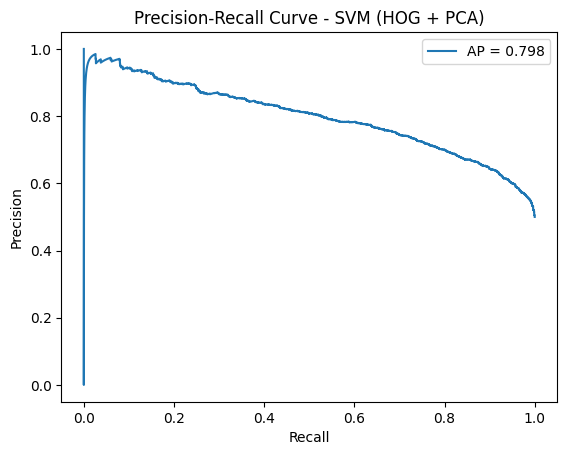

In [40]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

yprob = bestsvm.decision_function(Xtest_pca)

precision, recall, _ = precision_recall_curve(ytest, yprob)
ap = average_precision_score(ytest, yprob)

plt.figure()
plt.plot(recall, precision, label="AP = %.3f" % ap)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - SVM (HOG + PCA)")
plt.legend()
plt.savefig("precision_recall_curve.png", dpi=300, bbox_inches="tight")
plt.show()


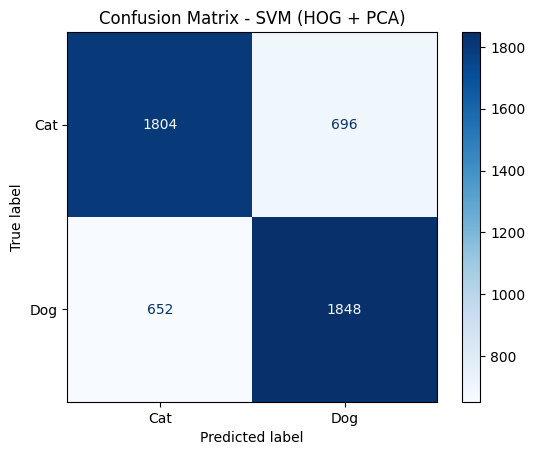

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(ytest, ypred_pca)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Cat", "Dog"]
)

disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - SVM (HOG + PCA)")
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches="tight")
plt.show()


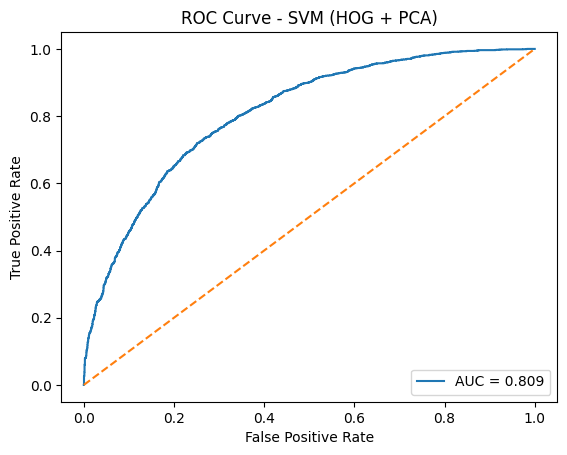

In [42]:
from sklearn.metrics import roc_curve, auc

yprob = bestsvm.decision_function(Xtest_pca)

fpr, tpr, _ = roc_curve(ytest, yprob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label="AUC = %.3f" % roc_auc)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM (HOG + PCA)")
plt.legend(loc="lower right")
plt.savefig("roc_curve.png", dpi=300, bbox_inches="tight")
plt.show()
